In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
#import minmax module
from sklearn.preprocessing import MinMaxScaler

In [5]:
data = data.iloc[:,1:5]

In [7]:
norm = MinMaxScaler()
norm.fit(data)

MinMaxScaler()

In [8]:
norm_data = norm.transform(data)

In [9]:
type(norm_data)

numpy.ndarray

In [10]:
# Hierarchical clustering
hier = linkage(norm_data,method="complete",metric="euclidean")

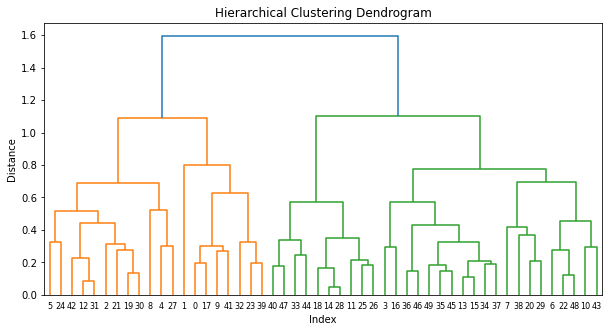

In [11]:
plt.figure(figsize=(10,5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(hier,leaf_rotation=0.,leaf_font_size=8.)
plt.show()

In [12]:
h_comp = AgglomerativeClustering(n_clusters=3, linkage='complete',affinity = "euclidean").fit(norm_data)

In [13]:
cluster_labels= pd.Series(h_comp.labels_)

In [14]:
data['clust']=cluster_labels

In [15]:
cl1 = data.iloc[:,1:12].groupby(data.clust).median()
cl1

,Assault,UrbanPop,Rape,clust
clust,,,,
0,254.5,70.0,27.35,0.0
1,132.5,70.0,18.40,1.0
2,82.0,52.0,11.25,2.0
